# Observations and Insights

# 1 
One of my observations is that the sexes should have been 50/50 to have better scientific analysis.  Equality in the numbers will provide better data sets to evaluate. 

# 2
The other is that a lab should perform the same number of trials per drug to have better scientific analysis. You don't have the significant observance of tumor regression. 

# 3
In conclusion, while being able to get information out of the datasets was successful, they did not run enough trials, and their data is skewed by preferring Capomulin over other drugs. In successful clinical trials, you have constants and variables, but it is all standardized and the same. You let your variables (different drugs or treatment plan) show you which is the better outcome. 

## Dependencies and starter code

In [3]:
%matplotlib notebook

In [4]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [5]:
# Study data files

mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

In [6]:
# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [7]:
# Combine the data into a single dataset

all_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
all_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regiment

summary_stats = pd.DataFrame(all_data.groupby("Drug Regimen").count())
summary_stats

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [9]:
# Mean, Median, Standard Deviation, Variance, SEM

summary_stats["Mean"] = pd.DataFrame(all_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary_stats["Median"] = pd.DataFrame(all_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary_stats["Standard Deviation"] = pd.DataFrame(all_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary_stats["Variance"] = pd.DataFrame(all_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary_stats["SEM"] = pd.DataFrame(all_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

summary_stats = summary_stats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

summary_stats = summary_stats.rename(columns = {"Mouse ID" : "Trials"})

summary_stats.head()

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar plots

<IPython.core.display.Javascript object>


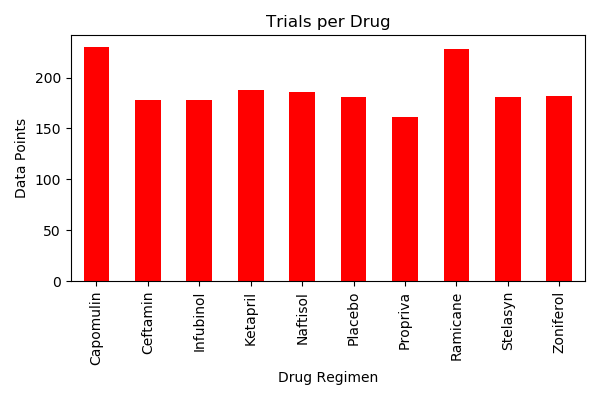

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = summary_stats[["Trials"]]
data_points.plot(kind="bar", figsize=(6,4), color="r", legend=False)
plt.title("Trials per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


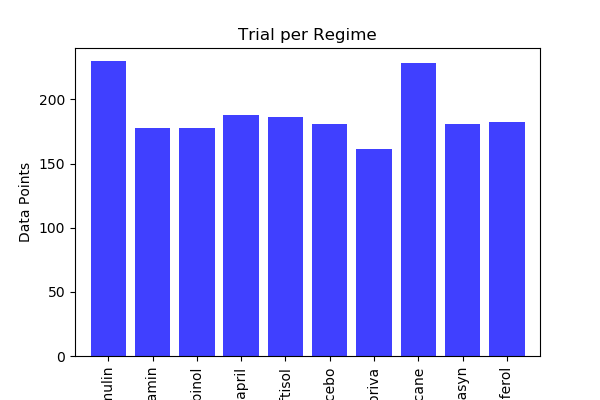

Text(0, 0.5, 'Data Points')

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(data_points))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6,4))
plt.bar(x_axis, data_points["Trials"], color = "b", alpha=0.75, align="center")

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, data_points.index.values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(data_points["Trials"]) + 10)

plt.title("Trial per Regime")
plt.xlabel("Medications")
plt.ylabel("Data Points")


## Pie plots

In [12]:
# define male vs female data 
gender_group = all_data.groupby(["Mouse ID","Sex"])
gender_group

# get counts

gender_df = pd.DataFrame(gender_group.size())
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]
mouse_gender["Percentage per Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))
mouse_gender["Percentage per Sex"] = mouse_gender["Percentage per Sex"]

mouse_gender

,Total Count,Percentage per Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


<IPython.core.display.Javascript object>


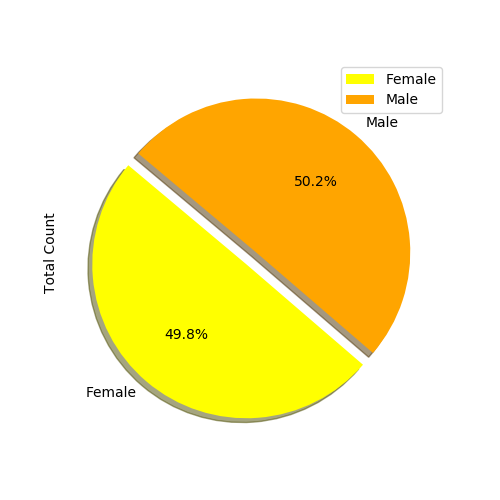

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ['yellow', 'orange']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")


<IPython.core.display.Javascript object>


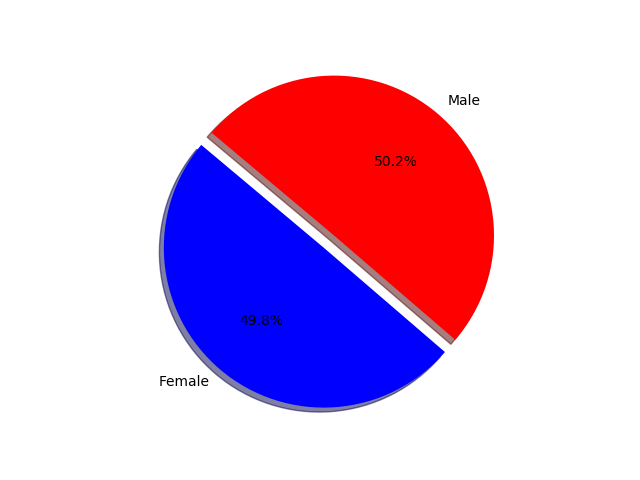

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure()
labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['blue', 'red']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

## Quartiles, outliers and boxplots

In [15]:
# Gather the data

best_treatments = all_data[all_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_treatments = best_treatments.sort_values(["Timepoint"], ascending=True)
best_treatments

best_data = best_treatments[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
best_data.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.0
1391,Infubinol,q132,0,45.0
195,Capomulin,i738,0,45.0
205,Ramicane,a520,0,45.0
1370,Ceftamin,p438,0,45.0


In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

best_treatment_df = best_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_treatment_df.head()

best_df = best_treatment_df.to_frame()
best_df

top_4 = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_df = best_df.reset_index()
tumor_quads = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_df = pd.DataFrame(tumor_quads)
tumor_df = tumor_df.reindex(top_4)
tumorvolume = [volume for volume in tumor_df['Tumor Volume (mm3)']]

In [17]:
quartiles = best_treatment_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume is: {lowerq}")
print(f"The upper quartile of volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of volume is: 37.187743802499995
The upper quartile of volume is: 59.930261755000004
The interquartile range of volume is: 22.74251795250001
The the median of volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


<IPython.core.display.Javascript object>


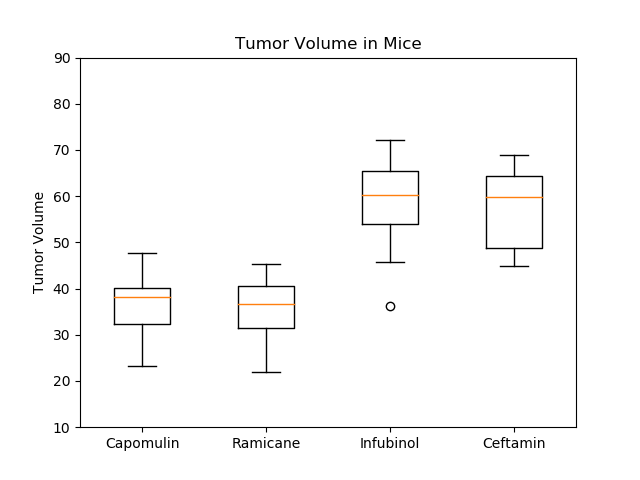

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1 , ax1 = plt.subplots()
ax1.set_title('Tumor Volume in Mice')
ax1.set_ylabel('Tumor Volume')
plt.boxplot(tumorvolume, labels=top_4)
plt.ylim(10,90)
plt.show()



## Line and scatter plots

<IPython.core.display.Javascript object>


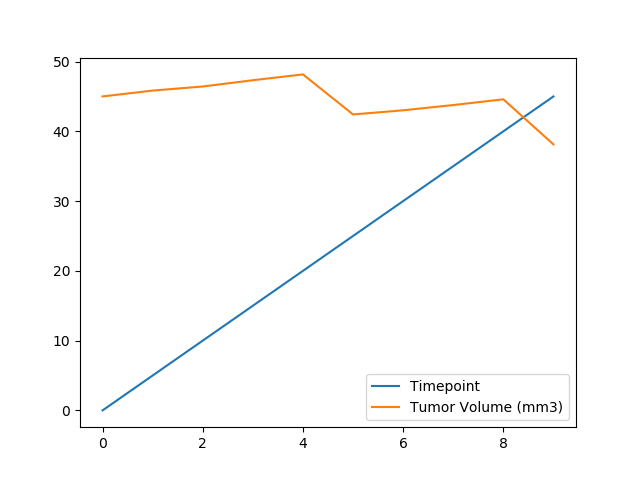

In [33]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

tpvsvolume = all_data[all_data["Mouse ID"].isin(["j119"])]
tpvsvolume

tpvsvolume_df = tpvsvolume[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
tpvsvolume_df

lineplot = tpvsvolume_df.reset_index()
lineplot

line_final = lineplot[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_final

lines = line_final.plot.line()


In [30]:
# Gather data

capo_df = all_data.loc[(all_data["Drug Regimen"] == "Capomulin"),:]


<IPython.core.display.Javascript object>


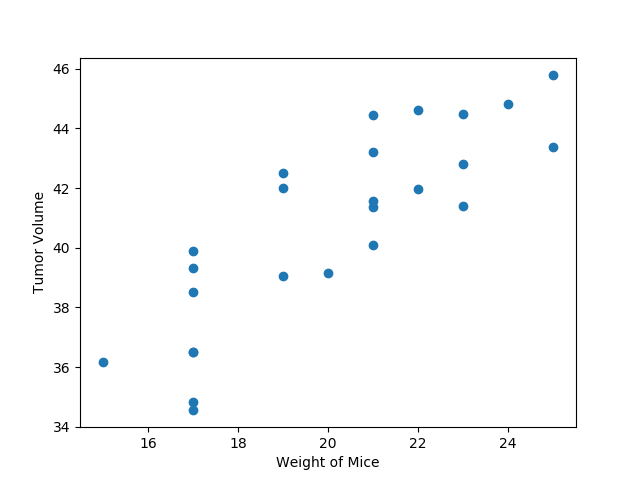

In [34]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.figure()
mouse_weight = capo_df.groupby(capo_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capo_df.groupby(capo_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight, tumor_volume)
plt.xlabel("Weight of Mice")
plt.ylabel("Tumor Volume")
plt.show()

<IPython.core.display.Javascript object>


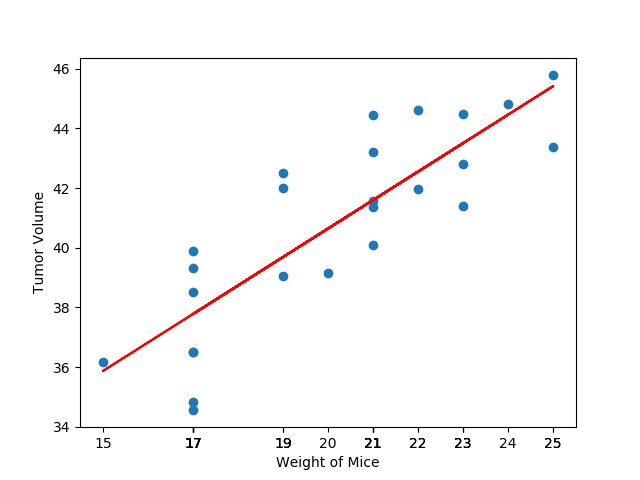

the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.84


In [37]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen


plt.figure()
mouse_weight = capo_df.groupby(capo_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capo_df.groupby(capo_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

slope, int, r, p , std_err = st.linregress(mouse_weight, tumor_volume)

fit = slope * mouse_weight + int

plt.scatter(mouse_weight, tumor_volume)
plt.xlabel("Weight of Mice")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight, fit, "r-")
plt.xticks(mouse_weight)
plt.show()

corr = round(st.pearsonr(mouse_weight, tumor_volume)[0],2)
print(f'the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {corr}')
